# Dataset Overview

Our dataset was created specifically for the use case of identifying ambulance sounds vs. road noises by researchers from Ziauddin University, Karachi, Pakistan
It was collected through mixed methods such as audio from video surveillance, laptop audio recordings, and microphones at three different locations that were specifically selected close to hospitals to increase the chances of collecting ambulance sounds.
In addition, online audio road recordings were also added to the dataset for additional road noise data. It was manually labelled as ambulance sound which contains 932 rows  vs road noise and has 901 rows.

The dataset is available for download from the Scientific Data.

* [Link to Dataset](https://www.nature.com/articles/s41597-022-01727-2#Sec6)

### Imports

In [1]:
import numpy as np
import pandas as pd

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions

### Load data

In [2]:
train = pd.read_csv('/Users/francescue/Documents/MIDS/207/final_project/mids-207-final-project-summer23-Nick-Frances-Jerry-Chi/Data/processed_data/train.csv')

In [3]:
train.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,ambulance217.wav,0.139713,0.086649,1718.602013,1358.252254,2621.874530,0.118756,-288.023376,114.704521,-49.967983,...,21.560863,-2.039799,-11.907887,4.912855,13.993547,2.139968,-1.012578,-5.569259,5.022685,Emergency_Vehicle_Sirens
1,ambulance614.wav,0.157152,0.311643,2124.173559,1696.108125,3580.723220,0.155499,-70.083099,98.373528,-64.853477,...,-2.383164,-20.189186,-8.850918,-7.337553,-9.583914,-6.074600,7.512115,-12.908149,-4.624047,Emergency_Vehicle_Sirens
2,ambulance296.wav,0.130614,0.104730,1135.478041,1637.776357,1971.530386,0.083637,-225.157990,140.605301,-3.439930,...,-6.337937,0.079239,16.186857,7.618846,6.098399,0.359855,-2.275174,-4.145103,12.254273,Emergency_Vehicle_Sirens
3,ambulance842.wav,0.340375,0.016640,1121.869495,1463.694632,1922.045429,0.076848,-337.975098,170.470551,-24.394335,...,0.555994,-4.280982,7.192675,2.134054,8.447920,-2.592149,-1.022108,-12.163561,1.063696,Emergency_Vehicle_Sirens
4,road855.wav,0.515787,0.089827,1971.318082,2248.139603,4054.146453,0.090444,-88.496468,113.961983,-16.151613,...,-2.643689,-5.490697,-1.663775,-9.920135,-4.093155,-12.266290,-5.661296,-10.810695,-5.942706,Road_Noises


In [4]:
print('train data shape', train.shape)

train data shape (1283, 28)


In [5]:
train.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [6]:
# check unique filename duplication
train.filename.duplicated().sum()

0

##### Features were extracted through Librosa library



| Column                | Description                                                                                                                                                          |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| filename              | Name of the file                                                                                                                                                     |
| chroma_stft           | Identifies high/low tones or pitches.                                                                                                                                |
| rmse                   | Root Mean Square Energy , average energy of audio signal over certain timeframe.                                                                                                                               |
| spectral_centroid     | Measures the center of mass or average frequency content of a signal's spectrum. Can also be referred to as "tonal" color.                                           |
| spectral_bandwidth    | Describes width or spread of a signal's spectrum.                                                                                                                    |
| rolloff               | Describes the rate at which the energy of a signal decreases beyond a certain frequency threshold.                                                                   |
| zero_crossing_rate    | Measures signal changes as it crosses the zero-axis in audio time series.                                                                                            |
| mfcc1 - mfcc20        | Mel Frequency Cepstral Coefficient is a compact representation of the spectrum of an audio signal. Each of the 20 coefficients extracted contains information about the rate change in each spectrum band. |
| label                 | 1 for ambulance, 0 for road.                                                                                                                         |

In [7]:
# descriptive stats
train.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,...,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,0.423357,0.140383,1661.994285,1759.457502,2995.636772,0.090244,-178.543727,123.622547,-31.247957,7.669419,...,-0.385993,1.537978,-4.443481,1.070312,-1.693427,2.284193,-0.985706,0.350630,-2.109408,2.345553
std,0.194491,0.112072,568.780363,418.068756,1226.618083,0.043313,105.951806,35.742525,27.168597,21.208423,...,8.904836,9.691137,8.218987,8.352034,6.847323,5.598956,5.592299,6.672678,6.327927,5.940925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370850,-95.584740,-169.964600,-116.537430,...,-36.185795,-45.170395,-39.959049,-47.971622,-38.367073,-31.176121,-24.225430,-38.745445,-38.480194,-23.512190
25%,0.232709,0.051876,1281.246984,1488.575860,2037.579346,0.059816,-245.779968,102.230309,-50.145872,-3.999586,...,-5.386863,-3.146379,-7.858300,-2.919626,-5.048411,-1.085240,-4.139219,-2.354093,-4.907399,-0.404642
50%,0.427473,0.111098,1564.935254,1740.391330,2769.662409,0.088811,-168.389969,128.956314,-31.319166,6.296282,...,0.043796,3.295208,-3.880535,2.046180,-1.327652,2.705114,-0.380893,1.710392,-1.235979,2.548940
75%,0.609933,0.200810,1926.155993,1984.871040,3596.886521,0.112347,-99.704189,150.870911,-10.989207,19.622737,...,4.036037,7.034442,0.479533,5.848694,2.317088,6.231009,2.133673,3.972470,1.153360,5.239073
max,0.777021,0.698226,4308.216776,3036.652806,7900.569035,0.385387,42.966679,220.324249,33.025337,90.227531,...,44.735867,47.972500,49.722000,41.536308,23.438484,32.182327,25.835632,29.030666,30.250853,39.031258


In [8]:
# check for nulls
train.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

#### Label Count

In [9]:
train.label.replace({'Emergency_Vehicle_Sirens': 1, 'Road_Noises': 0}, inplace=True )

In [10]:
X_train = train.iloc[:,1:27]
y_train = train.iloc[:,-1]

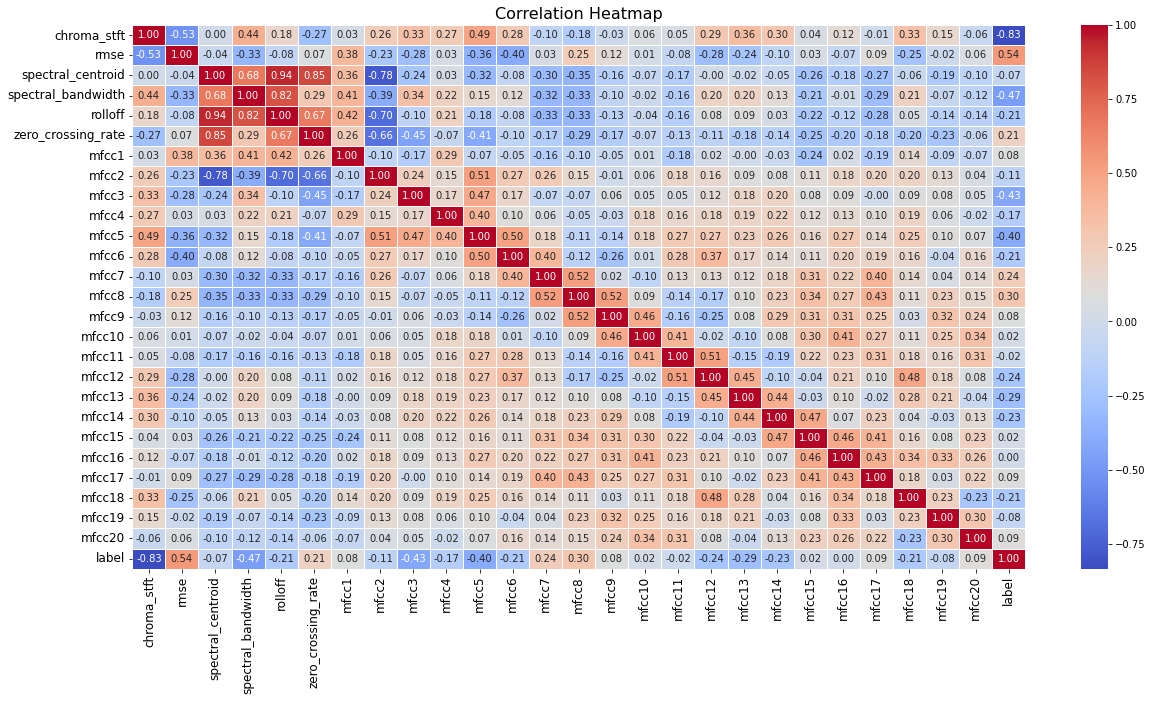

In [11]:
plt.figure(figsize=(20, 10))

sns.heatmap(
    train.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

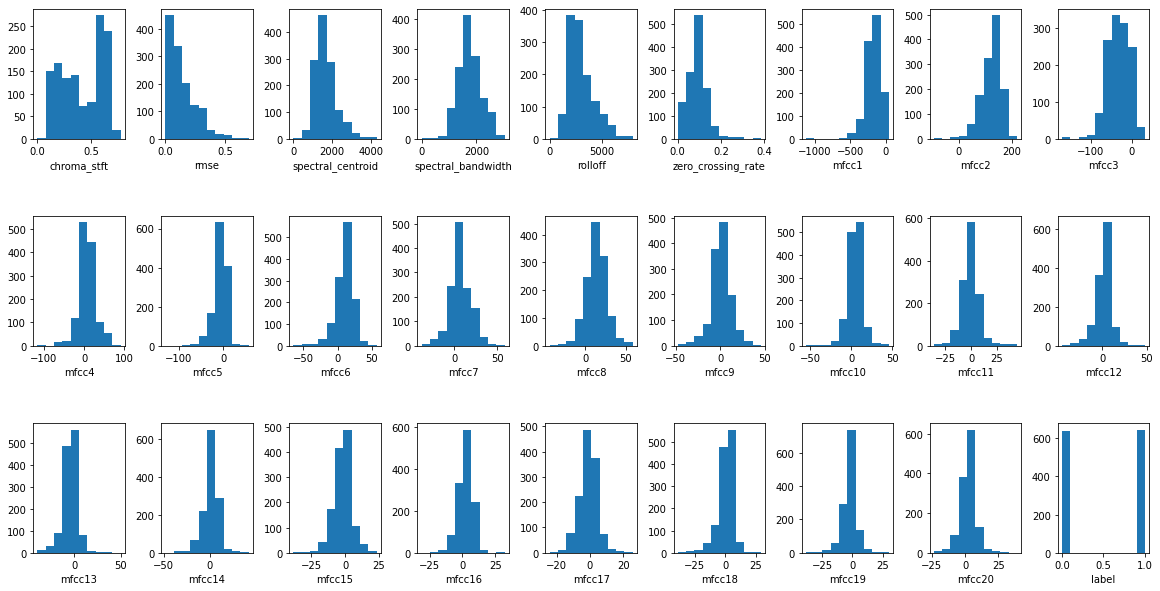

In [12]:
columns = list(train.columns)
columns.remove("filename")
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(20,10))
for idx, ax in enumerate(axes.flatten()):
    ax.hist(train[columns[idx]])
    ax.set_xlabel(columns[idx])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


### PCA
- We want to examine if we can reduce the dimension of our dataset

In [13]:
# split for PCA
X_train = train.iloc[:,1:27]
y_train = train.iloc[:,-1]

print(f'shape of X_train {X_train.shape}')
print(f'shape of y_train {y_train.shape}')

shape of X_train (1283, 26)
shape of y_train (1283,)


In [14]:
# standardization
sc_x = StandardScaler()
X_train_std = sc_x.fit(X_train).transform(X_train)

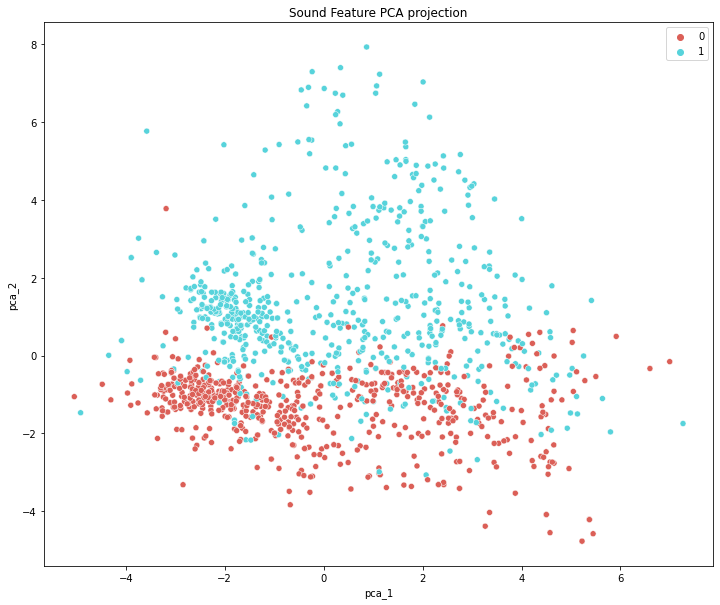

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=0)
z = pca.fit_transform(X_train_std)
df = pd.DataFrame()
df["y"] = y_train
df["pca_1"] = z[:,0]
df["pca_2"] = z[:,1]

plt.figure(figsize=(12, 10))
sns.scatterplot(x="pca_1", y="pca_2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Sound Feature PCA projection") 
plt.show()

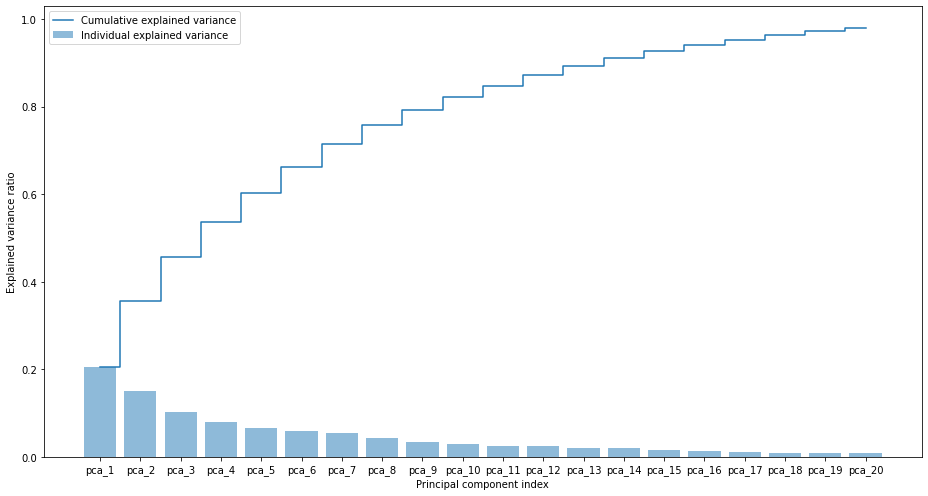

In [16]:
x_label = ['pca_' + str(i) for i in range(1,21)]
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
fig, ax = plt.subplots(figsize=(13,7))
plt.bar(x_label, exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Explained variance suggest up to 17 components to reach 90%. Let's fit the PCA with n=17 and examine the loadings.

In [17]:
pca = PCA(n_components=17)
pca.fit_transform(X_train_std)

array([[-1.0258692 , -0.69853261,  0.99290458, ..., -0.71535183,
        -0.33353423, -0.86802274],
       [ 4.61401755,  1.79175962,  2.03970525, ...,  0.49901177,
         1.00272879,  0.42470049],
       [-2.3742639 ,  1.23239954, -1.54299859, ..., -1.19747557,
         1.36296772,  0.38640025],
       ...,
       [ 4.6520233 , -2.29584895,  0.52825218, ..., -0.5773296 ,
        -0.31499896,  0.5090141 ],
       [ 3.5020972 ,  0.52986841,  3.15990119, ..., -0.0401268 ,
         0.51348522, -0.120496  ],
       [-2.35754029,  1.21225693, -1.11425961, ...,  0.25269407,
         0.60257952, -0.09232166]])

In [18]:
components = pd.DataFrame(pca.components_, columns=X_train.columns)
#First principal component
components[components.loc[0, :].abs().sort_values(ascending=False).index].loc[0, :]

spectral_centroid     0.352249
zero_crossing_rate    0.328505
mfcc2                -0.314408
rolloff               0.313330
mfcc5                -0.235733
mfcc17               -0.234651
mfcc15               -0.228395
mfcc16               -0.221187
mfcc7                -0.214755
mfcc8                -0.194577
spectral_bandwidth    0.191847
mfcc11               -0.163868
mfcc1                 0.159518
mfcc19               -0.151334
mfcc6                -0.151021
mfcc3                -0.140941
mfcc10               -0.135631
mfcc18               -0.129919
mfcc20               -0.129259
mfcc14               -0.125150
mfcc9                -0.123267
mfcc12               -0.102886
chroma_stft          -0.099611
mfcc13               -0.089361
rmse                  0.070791
mfcc4                -0.065235
Name: 0, dtype: float64

In [19]:
# Second principal component
components[components.loc[1, :].abs().sort_values(ascending=False).index].loc[1, :]

spectral_bandwidth   -0.381103
chroma_stft          -0.365220
rmse                  0.300563
mfcc12               -0.291728
mfcc5                -0.283849
rolloff              -0.252622
mfcc13               -0.239077
mfcc6                -0.234903
mfcc18               -0.234169
mfcc4                -0.217638
mfcc8                 0.216891
mfcc3                -0.207334
spectral_centroid    -0.168665
mfcc9                 0.137005
mfcc14               -0.105817
mfcc1                -0.105172
mfcc11               -0.082061
mfcc17                0.070178
mfcc16               -0.069391
mfcc7                 0.067023
mfcc20                0.052430
mfcc15                0.047805
mfcc19               -0.029219
mfcc2                -0.019479
mfcc10               -0.012498
zero_crossing_rate   -0.010482
Name: 1, dtype: float64

* Component 1 has relatively high loadings on variables such as spectral_centroid, zero_crossing_rate, and mfcc1. This suggests that Component 1 is capturing information related to spectral characteristics, such as spectral centroid (indicating the average frequency content), the rate of signal crossings through zero, and the second Mel-frequency cepstral coefficient.
* Component 2 has high loadings on variables such as spectral_bandwidth, chroma_stft. This indicates that Component 2 is capturing information related to chroma features (related to musical pitch), spectral bandwidth the width of the frequency bands.


The need for a larger number of components to explain a significant portion of the variance indicates that the Spectral and MFCC features contain a rich set of information, and each component contributes to capturing specific aspects of the variability present in the data.